<a href="https://colab.research.google.com/github/hyunseo318/ESAA_23-1/blob/main/%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from math import pi
import re
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# from matplotlib import rc
# rc('font', family='AppleGothic')
# plt.rcParams['axes.unicode_minus'] = False

In [92]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [93]:
# working directory를 설정함.
import os
os.chdir("/content/drive/MyDrive/ESAA")

In [120]:
df = pd.read_csv("gs_dataset.csv", index_col=0)

In [127]:
# from sklearn.preprocessing import MinMaxScaler
# x = df.drop(['노인복지율'], axis=1)
# x_mm1= MinMaxScaler().fit_transform(x)
# x_mm2 = x.columns
# x_mm = pd.DataFrame(x_mm1, columns=x_mm2)
# x_mm.index = df.index

In [128]:
# x_mm

In [107]:
df.describe()

,노인1인당 생산가능인구,노인빈곤율,노령화지수,65세이상 인구비율,독거노인가구비율,노인복지율
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,4.704819,14.426923,2.128356,17.122450,9.173934,0.071438
std,1.611429,14.038771,1.311631,5.597911,4.897167,0.073588
min,2.237358,1.949671,0.705929,9.175668,2.624659,0.000000
25%,3.708913,6.011804,1.246613,12.663918,6.509646,0.015391
50%,4.683046,10.394360,1.932594,15.879766,7.268389,0.053352
75%,5.313498,16.139712,2.451818,20.106759,9.967839,0.102947
max,9.192159,58.065553,6.397833,28.803874,20.980757,0.222156


In [123]:
df['노인1인당 생산가능인구']=pd.qcut(df['노인1인당 생산가능인구'],5,labels=[1,2,3,4,5])
df['노인빈곤율']=pd.qcut(df['노인빈곤율'],5,labels=[1,2,3,4,5])
df['노령화지수']=pd.qcut(df['노령화지수'],5,labels=[1,2,3,4,5])
df['65세이상 인구비율']=pd.qcut(df['65세이상 인구비율'],5,labels=[1,2,3,4,5])
df['독거노인가구비율']=pd.qcut(df['독거노인가구비율'],5,labels=[1,2,3,4,5])
df

,노인1인당 생산가능인구,노인빈곤율,노령화지수,65세이상 인구비율,독거노인가구비율,노인복지율
id,,,,,,
염창동,5,1,1,1,1,0.000000
등촌1동,5,1,3,1,1,0.068329
등촌2동,3,2,3,3,2,0.062794
등촌3동,1,5,5,4,5,0.222156
화곡본동,3,2,4,5,2,0.107219
화곡2동,3,3,2,3,4,0.034831
화곡3동,2,2,3,4,3,0.024456
화곡4동,2,3,4,4,4,0.000000
화곡6동,5,2,2,4,3,0.061362


In [124]:
df.head()

,노인1인당 생산가능인구,노인빈곤율,노령화지수,65세이상 인구비율,독거노인가구비율,노인복지율
id,,,,,,
염창동,5,1,1,1,1,0.000000
등촌1동,5,1,3,1,1,0.068329
등촌2동,3,2,3,3,2,0.062794
등촌3동,1,5,5,4,5,0.222156
화곡본동,3,2,4,5,2,0.107219


In [125]:
df_features = df.drop(['노인복지율'],axis=1)

In [126]:
df_features = df_features.reset_index(drop=False)
df_features

,id,노인1인당 생산가능인구,노인빈곤율,노령화지수,65세이상 인구비율,독거노인가구비율
0,염창동,5,1,1,1,1
1,등촌1동,5,1,3,1,1
2,등촌2동,3,2,3,3,2
3,등촌3동,1,5,5,4,5
4,화곡본동,3,2,4,5,2
5,화곡2동,3,3,2,3,4
6,화곡3동,2,2,3,4,3
7,화곡4동,2,3,4,4,4
8,화곡6동,5,2,2,4,3
9,화곡8동,4,3,3,3,4


In [129]:
categories = list(df_features)[1:]
categories

['노인1인당 생산가능인구', '노인빈곤율', '노령화지수', '65세이상 인구비율', '독거노인가구비율']

In [130]:
val_c1 = df_features.loc[0].drop('id').values.flatten().tolist()
val_c1 += val_c1[:1]

angles = [n/float(len(categories))*2*pi for n in range(len(categories))]
angles += angles[:1]

In [131]:
val_c1

[5, 1, 1, 1, 1, 5]

In [132]:
angles

[0.0,
 1.2566370614359172,
 2.5132741228718345,
 3.7699111843077517,
 5.026548245743669,
 0.0]

In [133]:
# import matplotlib.font_manager as fm

# # 설치된 폰트 출력
# font_list = [font.name for font in fm.fontManager.ttflist]
# font_list

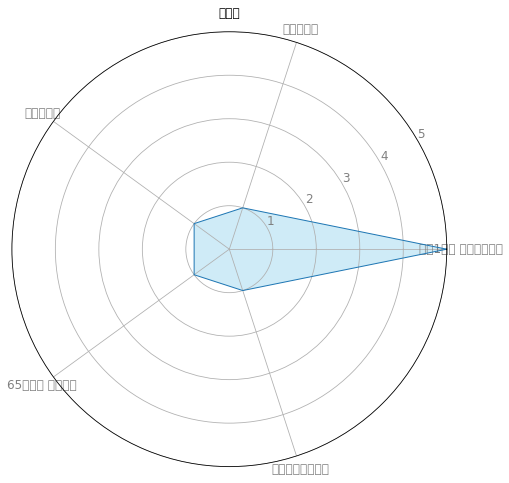

In [137]:
fig,ax = plt.subplots(nrows=1, ncols=1, figsize=(8,8),subplot_kw=dict(polar=True))

plt.title(df_features['id'][0])
plt.xticks(angles[:-1], categories, color='grey',size=12)
plt.yticks(np.arange(1,6),['1','2','3','4','5'],color='grey',size=12)
plt.ylim(0,5)
ax.set_rlabel_position(30)

ax.plot(angles,val_c1,linewidth=1,linestyle='solid',label='Client c1')
ax.fill(angles,val_c1,'skyblue',alpha=0.4)